# 1. Installing Packages

In [ ]:
!pip install lime tensorflow numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  !pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Importing the Modules

In [ ]:
import numpy as np

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_v3
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt


# 3. Loading the classification model and Sample Image

In [ ]:
model = inception_v3.InceptionV3("/content/Data/HW_best_model.h5")

In [ ]:
image_path = '/content/Data/sample_image.png'  
num_features = 5 
num_samples = 1000 

# 4. Defining the process image


In [ ]:
def preprocess_image(image_path):
    image = keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    image = keras.preprocessing.image.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = inception_v3.preprocess_input(image)
    return image

image = preprocess_image(image_path)


In [ ]:
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

1/1 [==============================] - 2s 2s/step


# 5. Explaining the model's predictions

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(image[0].astype('double'), model.predict, top_labels=1,
                                        num_features=num_features, num_samples=num_samples)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


# Evaluating the performance

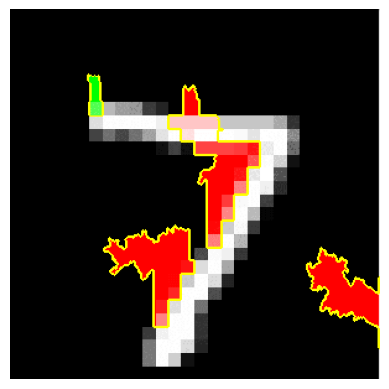

In [ ]:
temp, mask = explanation.get_image_and_mask(predicted_class, positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.axis('off')
plt.show()
